In [1]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import matplotlib.pyplot as plt

from sklearn.decomposition import KernelPCA
import plotly.express as px


In [2]:
df =load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df.drop(columns='species')
features = KernelPCA(n_components=3).fit_transform(X)
px.scatter_3d(x=features[:,0],y = features[:,1], z =features[:,2])

In [4]:
from sklearn.cluster import KMeans 

In [5]:
wcss = []
for k  in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(features)
    wcss.append({
        'k':k,
        'wcss':model.inertia_
    })

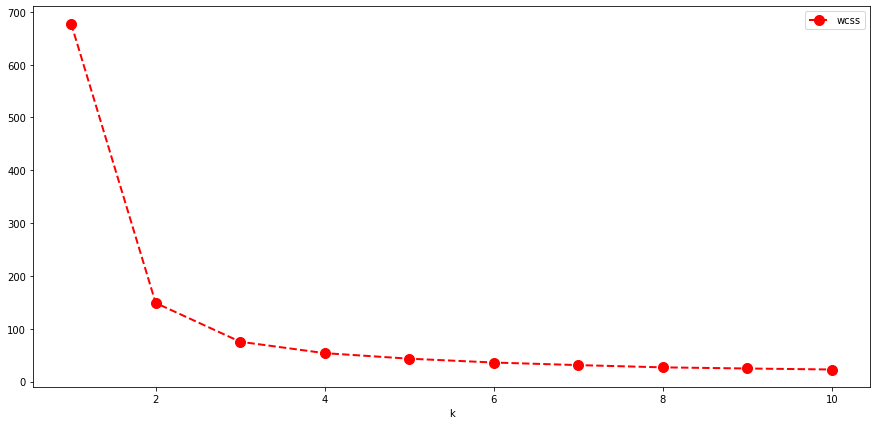

In [6]:
pd.DataFrame(wcss).plot(kind='line', x='k', y ='wcss',
                                    linewidth=2, markersize=10, style='ro--', figsize=(15, 7))
plt.show()

In [7]:


model = KMeans(n_clusters=3)
model.fit(features)
groups = model.predict(features)
# print(groups)
px.scatter_3d(x = features[:,0], y=features[:,1], z = features[:,2], color=groups, symbol= groups)

In [8]:
from sklearn.pipeline import make_pipeline

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
model = make_pipeline(KernelPCA(n_components=2),KMeans(n_clusters=3))

In [11]:
model.fit(X)

Pipeline(steps=[('kernelpca', KernelPCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3))])

In [12]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])